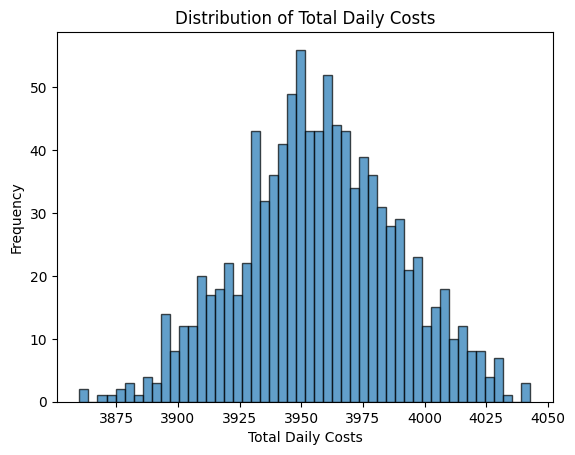

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
starting_inventory = 100
average_daily_demand = 10
std_dev_demand = 2
lead_time = 5
restock_order = 50
simulation_days = 365
num_simulations = 1000
holding_cost_per_unit = 0.1
out_of_stock_cost_per_unit = 1.0

def run_simulation():
    inventory = starting_inventory
    total_costs = 0
    restock_queue = []

    for day in range(simulation_days):
        # Check if any restocking orders arrive today
        if restock_queue and restock_queue[0] == day:
            inventory += restock_order
            restock_queue.pop(0)

        # Demand for today
        demand = np.random.normal(average_daily_demand, std_dev_demand)
        demand = max(0, demand)  # Ensure demand is non-negative

        # Calculate costs
        if inventory >= demand:
            holding_cost = inventory * holding_cost_per_unit
            inventory -= demand
            out_of_stock_cost = 0
        else:
            holding_cost = inventory * holding_cost_per_unit
            out_of_stock_cost = (demand - inventory) * out_of_stock_cost_per_unit
            inventory = 0

        total_costs += holding_cost + out_of_stock_cost

        # Restock if inventory is below the average daily demand
        if inventory < average_daily_demand:
            restock_queue.append(day + lead_time)

    return total_costs

# Run simulations
costs = [run_simulation() for _ in range(num_simulations)]

# Visualization
plt.hist(costs, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Daily Costs')
plt.xlabel('Total Daily Costs')
plt.ylabel('Frequency')
plt.show()


Mean Total Daily Cost: 4044.902617788016


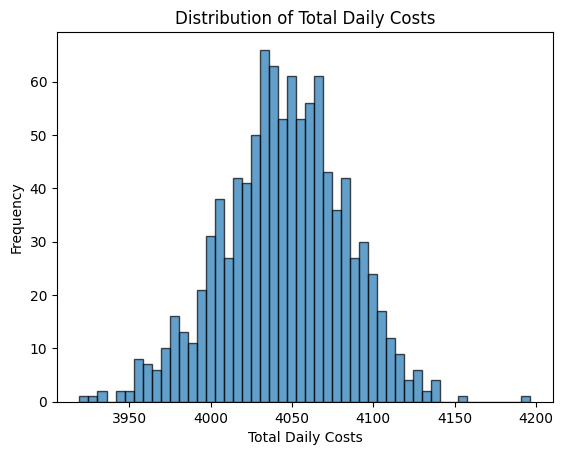

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
starting_inventory = 100
average_daily_demand = 15
std_dev_demand = 3
lead_time = 5
restock_order = 50
simulation_days = 365
num_simulations = 1000
holding_cost_per_unit = 0.1
out_of_stock_cost_per_unit = 1.0

def run_simulation():
    inventory = starting_inventory
    total_costs = 0
    restock_queue = []

    for day in range(simulation_days):
        # Check if any restocking orders arrive today
        if restock_queue and restock_queue[0] == day:
            inventory += restock_order
            restock_queue.pop(0)

        # Demand for today
        demand = np.random.normal(average_daily_demand, std_dev_demand)
        demand = max(0, demand)  # Ensure demand is non-negative

        # Calculate costs
        if inventory >= demand:
            holding_cost = inventory * holding_cost_per_unit
            inventory -= demand
            out_of_stock_cost = 0
        else:
            holding_cost = inventory * holding_cost_per_unit
            out_of_stock_cost = (demand - inventory) * out_of_stock_cost_per_unit
            inventory = 0

        total_costs += holding_cost + out_of_stock_cost

        # Restock if inventory is below the average daily demand
        if inventory < average_daily_demand:
            restock_queue.append(day + lead_time)

    return total_costs

# Run simulations
costs = [run_simulation() for _ in range(num_simulations)]

# Calculate mean total daily cost
mean_total_cost = np.mean(costs)
print(f"Mean Total Daily Cost: {mean_total_cost}")

# Visualization
plt.hist(costs, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Daily Costs')
plt.xlabel('Total Daily Costs')
plt.ylabel('Frequency')
plt.show()
